<a href="https://colab.research.google.com/github/MatthewTaylor20/MAT-494/blob/main/HW1_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

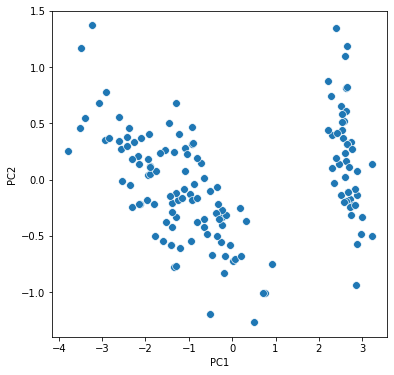

In [34]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import plotly.express as px



def PCA(X , num_components):
  X_meaned = X - np.mean(X , axis = 0)

  #Find covarience matrix
  cov_mat = np.cov(X_meaned , rowvar = False)
  #Find eigenvalues and eigenvectors of the covarience matrix
  eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)

  #sort the eigenvalues and eigenvectors
  sorted_index = np.argsort(eigen_values)[::-1]
  sorted_eigenvalue = eigen_values[sorted_index]
  sorted_eigenvectors = eigen_vectors[:,sorted_index]

  # select the first n eigenvectors 
  eigenvector_subset = sorted_eigenvectors[:,0:num_components]

  #Transform the data 
  X_reduced = np.dot(eigenvector_subset.transpose(),X_meaned.transpose()).transpose()

  return X_reduced




data = px.data.iris()
#prepare the data
x = data.iloc[:,0:4]
#prepare the target
target = data.iloc[:,4] 
#Applying it to PCA function
mat_reduced = PCA(x , 2)
#Creating a Pandas DataFrame of reduced Dataset
principal_df = pd.DataFrame(mat_reduced , columns = ['PC1','PC2'])
 
#Concat it with target variable to create a complete Dataset
principal_df = pd.concat([principal_df , pd.DataFrame(target)] , axis = 1)
plt.figure(figsize = (6,6))
sb.scatterplot(data = principal_df , x = 'PC1',y = 'PC2' , s = 60 , palette= 'icefire')